install

In [17]:
from os import listdir
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

In [26]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [53]:
path = r"C:/Users/USER/Desktop/CN240-allnew/train/anger/"
namelist = listdir(path)
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    for images in namelist:
        image = cv2.imread(path + "Alejandro_Toledo_0004.jpg", 0)

        # Recolor Feed
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  

        # Make Detections
        results = holistic.process(image)

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                    mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                    mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                    )

        cv2.imshow('image', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
cv2.destroyAllWindows()

In [9]:
results.face_landmarks.landmark[0].visibility

0.0

CAPTURE

In [9]:
import csv
import os
import numpy as np

In [10]:
num_coords = len(results.face_landmarks.landmark)
num_coords

468

In [11]:
landmarks = ['name','class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val), ]

In [12]:
landmarks

['name',
 'class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 

In [13]:
classlist = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

In [49]:
with open('C:/Users/USER/Desktop/CN240-allnew/train/coords-new.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [ ]:
# train
for classname in classlist:
    class_name = classname
    path = f"C:/Users/USER/Desktop/CN240-allnew/train/{class_name}/"
    namelist = listdir(path)
    with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
        for images in namelist:
            image = cv2.imread(path + images, 0)

            # Recolor Feed
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False  

            # Make Detections
            results = holistic.process(image)

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                        )

            # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
            #                              mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=1, circle_radius=1),
            #                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
            #                              )

             # Export coordinates
            try:    
                # Extract Face landmarks
                face = results.face_landmarks.landmark
                face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())

                # Append class name 
                face_row.insert(0, images)
                face_row.insert(1, class_name)

                # Export to CSV
                with open('C:/Users/USER/Desktop/CN240-allnew/train/coords-new.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(face_row) 

            except:
                pass

            cv2.imshow('image', image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cv2.destroyAllWindows()

In [14]:
with open('C:/Users/USER/Desktop/CN240-allnew/test/coords-new.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [15]:
# test
for classname in classlist:
    class_name = classname
    path = f"C:/Users/USER/Desktop/CN240-allnew/test/{class_name}/"
    namelist = listdir(path)
    with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
        for images in namelist:
            image = cv2.imread(path + images, 0)

            # Recolor Feed
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False  

            # Make Detections
            results = holistic.process(image)

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                        )

            # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
            #                              mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=1, circle_radius=1),
            #                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
            #                              )

             # Export coordinates
            try:    
                # Extract Face landmarks
                face = results.face_landmarks.landmark
                face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())

                # Append class name 
                face_row.insert(0, images)
                face_row.insert(1, class_name)

                # Export to CSV
                with open('C:/Users/USER/Desktop/CN240-allnew/test/coords-new.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(face_row) 

            except:
                pass

            cv2.imshow('image', image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cv2.destroyAllWindows()

Train custom model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold

In [2]:
dftrain = pd.read_csv('C:/Users/USER/Desktop/CN240-allnew/train/coords_new_backup_310322_1805.csv')
dftest = pd.read_csv('C:/Users/USER/Desktop/CN240-allnew/test/coords_new_test_backup_310322_1833.csv')

In [3]:
dftrain_s = dftrain.sample(frac=1, random_state=1234)
dftest_s = dftest.sample(frac=1, random_state=1234)

In [34]:
dftrain_s.head(0)

,name,class,x1,y1,z1,v1,x2,y2,z2,v2,...,z466,v466,x467,y467,z467,v467,x468,y468,z468,v468


In [ ]:
# all_num = []
# for i in range(0, 468):
#     all_num.append(i)
# all_num

In [ ]:
# left_eye = [7, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 56, 110, 112, 130, 133, 144, 145, 153, 154, 155, 157, 158, 159, 160, 161, 163, 173, 190, 243, 246, 247]
# right_eye = [249, 252, 253, 254, 255, 256, 257, 258, 259, 260, 263, 286, 339, 341, 359, 362, 373, 374, 380, 381, 382, 384, 385, 386, 387, 388, 390, 398, 414, 463, 466, 467]
# nose = [1, 2, 3, 4, 5, 6, 8, 19, 20, 44, 45, 48, 49, 51, 59, 60, 64, 75, 79, 94, 97, 98, 99, 102, 115, 122, 125, 129, 131, 134, 141, 166, 168, 174, 193, 195, 196, 197, 198,
#         209, 218, 219, 220, 235, 236, 237, 238, 239, 240, 241, 242, 248, 250, 274, 275, 278, 279, 281, 289, 290, 294, 305, 309, 326, 327, 328, 331, 344, 351, 354, 358, 360,
#         363, 370, 392, 399, 417, 419, 420, 429, 438, 439, 439, 440, 455, 456, 457, 458, 459, 460, 461, 462]
# mouth = [0, 11, 12, 13, 14, 15, 16, 17, 37, 38, 39, 40, 41, 42, 57, 61, 62, 72, 73, 74, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 95, 96, 146, 176, 178, 180,
#         181, 183, 184, 185, 191, 267, 268, 269, 270, 271, 272, 287, 291, 292, 302, 303, 304, 306, 307, 308, 310, 311, 312, 314, 315, 316, 317, 318, 319, 320, 321, 324, 325,
#         375, 402, 403, 404, 405, 407, 408, 409, 415]
# all_at = left_eye + right_eye + nose + mouth
# all_at.sort()
# all_at

In [ ]:
# delete = list(set(all_num).difference(set(all_at)))
# delete2 = [i+1 for i in delete]
# delete2

In [83]:
# del_drop = ['name','class']
# for val in delete2:
#     del_drop += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val), ]

In [ ]:
# M = dftrain_s.drop(del_drop, axis=1) # features
# M

In [93]:
# # nose mouth eye
# X_train = dftrain_s.drop(del_drop, axis=1)
# y_train = dftrain_s['class'] # target value
# X_test = dftest_s.drop(del_drop, axis=1)
# y_test = dftest_s['class']

In [4]:
# normal
X_train = dftrain_s.drop(['name','class'], axis=1) # features
y_train = dftrain_s['class'] # target value
X_test = dftest_s.drop(['name','class'], axis=1) # features
y_test = dftest_s['class']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import interp
from sklearn import svm, datasets
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Instantiate the classification model and visualizer
model = LogisticRegression(max_iter=10000)

class_list = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

# j = 0
# for name in class_list:

i = 0
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for train, test in cv.split(X_train, y_train):
    probas_ = model.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, 5], pos_label='neutral')
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic Neutral')
plt.legend(loc="lower right")
plt.show()
#     j += 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import interp
from sklearn import svm, datasets
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Instantiate the classification model and visualizer

model = svm.SVC(kernel="linear", probability=True, random_state=12) #LogisticRegression(max_iter=10000)

class_list = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

j = 0
for name in class_list:
    i = 0
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for train, test in cv.split(X_train, y_train):
        probas_ = model.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, j], pos_label=name)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Random', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic {name.capitalize()}')
    plt.legend(loc="lower right")
    plt.show()
    j += 1

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

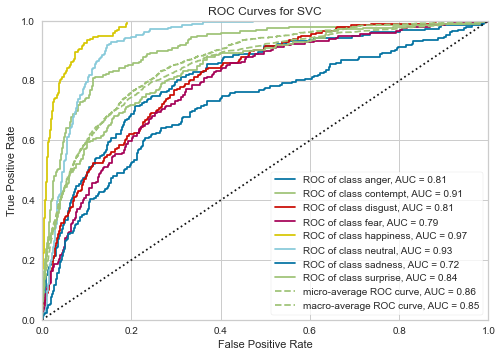

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [94]:
from sklearn import svm, datasets
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from yellowbrick.datasets import load_game

model = svm.SVC(kernel="linear", probability=True, random_state=12) #LogisticRegression(max_iter=10000)
visualizer = ROCAUC(model, classes=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold

train_set = []
test_set = []
cv = StratifiedKFold(n_splits=5)
modelsplit = cv.split(X_train, y_train)
for train, test in modelsplit:
    train_set.append(train)
    test_set.append(test)

In [28]:
Xtrains = X_train.iloc[train_set[2]]
Ytrains = y_train.iloc[train_set[2]]
Xtrains

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z466,v466,x467,y467,z467,v467,x468,y468,z468,v468
416,0.513869,0.726130,-0.048210,0,0.505765,0.657763,-0.153286,0,0.508564,0.671988,...,-0.062149,0,0.713969,0.393985,-0.018955,0,0.727678,0.382309,-0.020363,0
4757,0.528645,0.761870,-0.116114,0,0.543336,0.617563,-0.197502,0,0.529353,0.661872,...,-0.004388,0,0.757230,0.388410,0.100925,0,0.774329,0.374152,0.104850,0
6475,0.510775,0.801140,-0.085471,0,0.503462,0.681977,-0.159057,0,0.505836,0.716428,...,-0.019931,0,0.759915,0.411832,0.031994,0,0.780688,0.387941,0.033496,0
5488,0.442376,0.682152,-0.077943,0,0.415001,0.598060,-0.140998,0,0.440231,0.626646,...,-0.032565,0,0.688500,0.445695,-0.037323,0,0.708313,0.431977,-0.040412,0
2402,0.511731,0.692692,-0.096412,0,0.515091,0.610035,-0.160215,0,0.511628,0.640995,...,-0.003424,0,0.716857,0.421768,0.065031,0,0.733572,0.407311,0.067119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.525308,0.772778,-0.078648,0,0.511958,0.673034,-0.174910,0,0.519569,0.700541,...,-0.038348,0,0.760848,0.433004,0.006711,0,0.775883,0.421877,0.006062,0
3276,0.531557,0.741122,-0.118179,0,0.489115,0.629913,-0.218358,0,0.512804,0.662495,...,-0.040244,0,0.776170,0.353336,0.001260,0,0.796405,0.339120,-0.000598,0
1318,0.481937,0.746516,-0.086725,0,0.488211,0.625383,-0.178410,0,0.486961,0.661495,...,-0.032567,0,0.755988,0.437666,0.025269,0,0.774189,0.421698,0.027296,0
723,0.536002,0.687919,-0.173638,0,0.554819,0.551044,-0.210407,0,0.539083,0.610559,...,0.054309,0,0.760302,0.433076,0.169381,0,0.784367,0.412379,0.176486,0


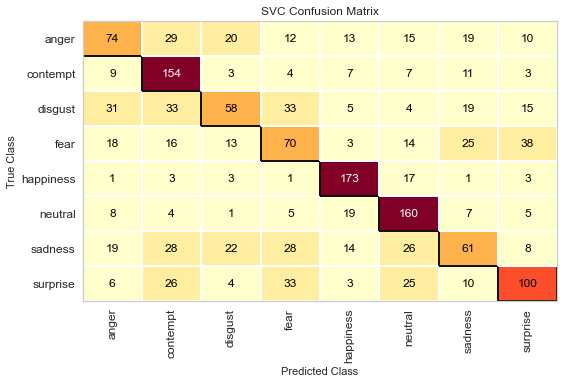

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [30]:
from sklearn import svm, datasets
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from yellowbrick.datasets import load_game

model = svm.SVC(kernel="linear", probability=True, random_state=12) #LogisticRegression(max_iter=10000)
#LogisticRegression(max_iter=10000)
#svm.SVC(kernel="linear", probability=True, random_state=12)
cm = ConfusionMatrix(model, classes=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'])

cm.fit(Xtrains, Ytrains)
cm.score(X_test, y_test)
cm.show()

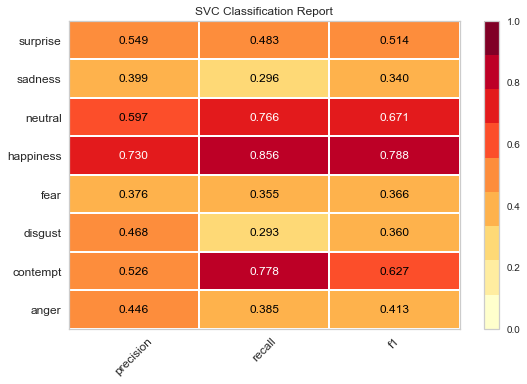

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [29]:
from sklearn import svm, datasets
from sklearn.linear_model import RidgeClassifier, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC, ClassificationReport
from yellowbrick.datasets import load_game

model = svm.SVC(kernel="linear", probability=True, random_state=12) #RidgeClassifier() #LogisticRegression(max_iter=10000)
visualizer = ClassificationReport(model, classes=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'])

# visualizer.fit(X_train, y_train)
# visualizer.score(X_test, y_test)

visualizer.fit(Xtrains, Ytrains)
visualizer.score(X_test, y_test)

visualizer.show()   

In [ ]:
print(len(y_test))

1609
